# Austin, TX Crime Report Analysis
## by Matt Walker

## Preliminary Wrangling

> This dataset contains a record of incidents that the Austin Police Department responded to and wrote a report for. An incident may have several offenses associated with it, but only the highest level offense of that incident is shown.  The data is from 2003 to present and is updated weekly. Due to the methodological differences in data collection, different data sources may produce different results. Comparisons should not be made between numbers generated with this database to any other official police reports. Data provided represents only calls for police service where a report was written. 

>  The Columns are described below:

> Incident Number - Incident report number<br>  
  Highest Offense Description - Description <br>
  Highest Offense Code - Code <br>
  Family Violence Incident involves family violence? - Y = Yes, N = No <br>
  Occurred Date Time - Date and time (combined) incident occurred <br>
  Occurred Date - Date the incident occurred <br>
  Occurred Time - Time the incident occurred <br>
  Report Date Time - Date and time (combined) incident was reported <br>
  Report Date - Date the incident was reported <br>
  Report Time - Time the incident was reported <br>
  Location Type - General description of the premise where the incident occurred <br>
  Address - Incident location <br>
  Zip code - Zip code where incident occurred <br>
  Council District - Austin city council district where the incident occurred <br>
  APD Sector - APD sector where incident occurred <br>
  APD District - APD district where incident occurred <br>
  PRA - APD police reporting area where incident occurred <br>
  Census Tract - Census tract where incident occurred <br>
  Clearance Status - How/whether crime was solved (see Clearance lookup) <br>
  Clearance Date - Date crime was solved <br>
  UCR Category - Code for the most serious crimes identified by the FBI as part of its Uniform Crime Reporting program <br>
  Category Description - Description of the most serious crimes identified by the FBI as part of UCR program <br>
  X-coordinate - X-coordinate where the incident occurred <br>
  Y-coordinate - Y-coordinate where incident occurred <br>
  Latitude - Latitude where incident occurred <br>
  Longitude - Longitude where the incident occurred <br>
  Location - 3rd party generated spatial column <br>
  <br>
> _Clearance lookup_  <br>
  C - Cleared by Arrest <br>
  O - Cleared by Exception <br>
  N - Not cleared 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import calendar 

%matplotlib inline

In [2]:
# Load in the dataset and view the first 5 rows
df = pd.read_csv('Crime_Reports_Full.csv') 
df.head() 

C:\Users\6440\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20195026634,THEFT,600,N,06/29/2019 07:00:00 PM,06/29/2019,1900.0,06/29/2019 09:23:00 PM,06/29/2019,2123.0,...,2.03,NaN,NaN,23H,Theft,3117230.0,3117230.0,30.316645,-97.732255,"(30.31664478, -97.73225521)"
1,20195026631,THEFT,600,N,06/29/2019 06:43:00 PM,06/29/2019,1843.0,06/29/2019 09:07:00 PM,06/29/2019,2107.0,...,18.06,NaN,NaN,23H,Theft,3130568.0,3130568.0,30.358305,-97.688830,"(30.35830469, -97.68883016)"
2,20195026626,TERRORISTIC THREAT,2704,N,06/29/2019 06:29:00 PM,06/29/2019,1829.0,06/29/2019 08:09:00 PM,06/29/2019,2009.0,...,15.04,NaN,NaN,NaN,NaN,3116733.0,3116733.0,30.345210,-97.733061,"(30.34520978, -97.733061)"
3,20195026620,CRIMINAL MISCHIEF,1400,N,06/29/2019 06:00:00 PM,06/29/2019,1800.0,06/29/2019 06:55:00 PM,06/29/2019,1855.0,...,204.08,NaN,NaN,NaN,NaN,3096967.0,3096967.0,30.467936,-97.792507,"(30.46793555, -97.79250733)"
4,20191800887,SUSPICIOUS PERSON,3403,N,06/29/2019 04:17:00 PM,06/29/2019,1617.0,06/29/2019 04:17:00 PM,06/29/2019,1617.0,...,24.21,NaN,NaN,NaN,NaN,3100423.0,3100423.0,30.165488,-97.789520,"(30.16548757, -97.78952006)"


In [3]:
# Take a look at the different columns and the datatypes associated with each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141169 entries, 0 to 2141168
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordin

In [4]:
# See how many rows and columns there are
df.shape

(2141169, 27)

### What is the structure of your dataset?

The dataset is a single table composed of 27 columns and 2141169 rows.

### What is/are the main feature(s) of interest in your dataset?

The main area I'm interested in are the Highest Offense Description because I want a description of the highest crime, not the code. The Occured Date and Occured Time could be useful to see when most crimes were commited. Category Description could be useful but odds are that it won't be more helpful than the Highest Offense Description. I also think that Location Type is useful for finding out where the crimes occured. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think Occured Date, Occured Time, and Location Type will prove extremely useful for the where and when of the crimes while the Highest Offense Description will be the bedrock of sorting the info out.

In [5]:
# See which 5 crimes are most popular 
df['Highest Offense Description'].value_counts().head(5)

BURGLARY OF VEHICLE      215485
THEFT                    198643
FAMILY DISTURBANCE       163091
CRIMINAL MISCHIEF        118325
BURGLARY OF RESIDENCE     74115
Name: Highest Offense Description, dtype: int64

In [6]:
top_crimes = df['Highest Offense Description'].value_counts() #Making a variable for the value counts of crimes
top_crimes_5 = top_crimes[0:5] #Limiting the variable to the top 5

In [7]:
df['Location Type'].value_counts()

RESIDENCE / HOME                                  827724
STREETS / HWY / ROAD / ALLEY                      492956
PARKING LOTS / GARAGE                             261420
COMMERCIAL / OFFICE BUILDING                      146077
OTHER / UNKNOWN                                    62470
DEPARTMENT / DISCOUNT STORE                        39209
GROCERY / SUPERMARKET                              32945
HOTEL / MOTEL / ETC.                               31043
RESTAURANTS                                        29873
CONVENIENCE STORE                                  28866
GOVERNMENT / PUBLIC BUILDING                       27682
BAR / NIGHT CLUB                                   22540
DRUG STORE / DR. OFFICE / HOSPITAL                 22230
GAS / SERVICE STATIONS                             15077
SPECIALTY  STORE (TV  FUR ETC.)                    13338
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)     12907
BANKS / SAVINGS & LOAN                              7497
CONSTRUCTION SITE              

I'm curious about where most of the crimes occur. So I'll make a plot of the locations and the counts of them.

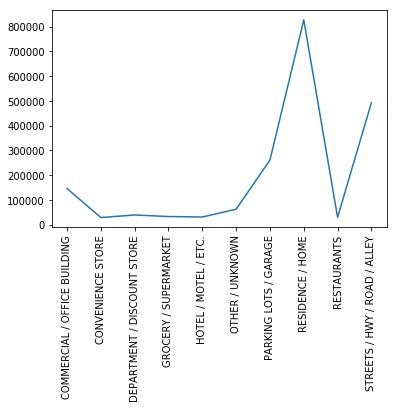

In [8]:
locate = df['Location Type'].value_counts()
top_locate = locate[:10]
sb.lineplot(data = df, x = top_locate.index, y = top_locate.values)
plt.xticks(rotation = 90);

Turns out home is the top place a crime occurs, followed by street and garages. 

Next I'll take a look at the top 5 crimes to see why that could be.

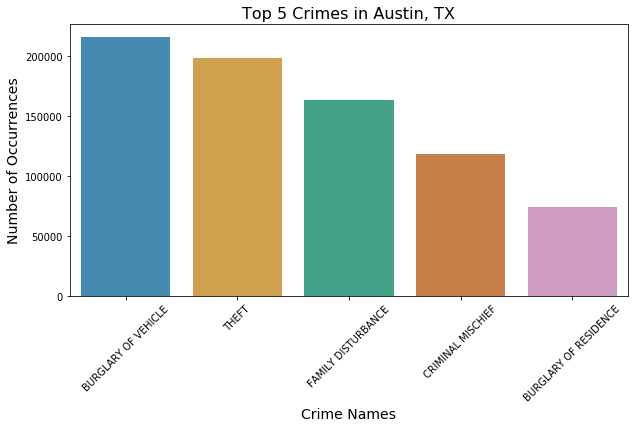

In [9]:
sb.set_palette('colorblind') # Making the color scheme set up for colorblind people
plt.figure(figsize = (10,5)) # Making the figure size 10x5
sb.barplot(top_crimes_5.index, top_crimes_5.values, alpha = 0.8) # Making a bar plot with the crime names on bottom and 
# the counts on the left. Also set them to be a bit softer color so not to cause eye strain
plt.title('Top 5 Crimes in Austin, TX', fontsize = 16) # The title and font size
plt.ylabel('Number of Occurrences', fontsize = 14) #y-axis label and font size
plt.xlabel('Crime Names', fontsize = 14) # x-axis label and font size
plt.xticks(rotation = 45) #Change the direction of the x ticks
plt.show();

The top 5 crimes in Austin are burglary of vehicles, theft, family disturbance, criminal mischief, and burglary of residence. I plan on investigating how the crimes compare on a yearly and monthly basis. 

Now I know what crimes are popular and what type of place they occur in, now it would be useful to know the progression of the top 5 crimes to see if there is an upward or downward trend in crimes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The data is heavily skewed to the right which is typical when gathering the top values of a category. The data shows that a person is 3 times more likely to have their vehicle stolen from than their house and that criminals are almost twice as likely to steal from your car than to damage or vandalize property. 

My main surprise is that family disturbance ranked so high, it's one of the crimes you never see or hear about on the news yet is more prevalent and damaging than stealing from a house. Considering that theft of any type and family disturbance are the highest reported crimes it comes as no surprise that the home is the dominant location type. 

The only transformation to the data was limiting it to the top 5 crimes and top 10 location types. Having 10 top crimes would be too many and it would make the plots messy and cluttered. I also changed the color palette so it was more easily viewed by colorblind people.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no unusual distributions, since the data skewed right which is typical of sorting values in a category by ascending.

In [10]:
# Converting the Occurred Date column to date time to make new columns for month and year
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
df['Year'] = df['Occurred Date'].dt.year
df['Month'] = df['Occurred Date'].dt.month
df['Day'] = df['Occurred Date'].dt.day

In [11]:
# Getting the value counts for the months and changing it to the abbreviated name
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].value_counts()

May    193704
Mar    186850
Apr    185699
Jun    183925
Aug    183551
Jul    183351
Oct    179046
Jan    178909
Sep    175593
Dec    164588
Nov    163658
Feb    162295
Name: Month, dtype: int64

In [12]:
# Save the index for the top 5 crimes
top_5 = top_crimes_5.index
# Making a dataset of only the top 5 crimes
df_top_5 = df[df['Highest Offense Description'].isin(top_5)]
# Reseting the index
df_top_5 = df_top_5.reset_index(drop = True)
# Creating a new column where each row is = 1
df_top_5['Count'] = 1
# Filling in the blanks for the Family Violence column
df_top_5['Family Violence'] = df_top_5['Family Violence'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_top_5_grpd = df_top_5.groupby(['Year', 'Highest Offense Description']).count().reset_index()

In [13]:
# Save the index for the top 5 crimes
top_location = top_locate.index
# Making a dataset of only the top 5 crimes
df_locate = df[df['Location Type'].isin(top_location)]
# Reseting the index
df_locate = df_locate.reset_index(drop = True)
# Creating a new column where each row is = 1
df_locate['Count'] = 1
# Filling in the blanks for the Family Violence column
df_locate['Family Di'] = df_locate['Location Type'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_location = df_locate.groupby(['Year', 'Month', 'Day', 'Location Type']).count().reset_index()

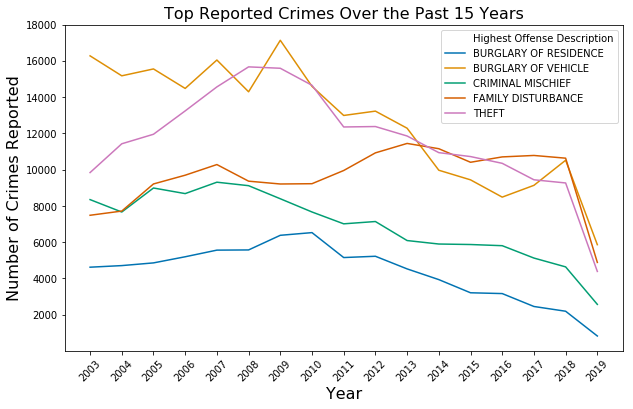

In [14]:
x_ticks = np.arange(2003, 2020, 1) # Setting the min to 2003, the max to 2020, and stepping by each year for ticks
y_ticks = np.arange(2000, 19000, 2000) # Setting the min to 2000, the max to 19000, and stepping by 2000 each tick
plt.figure(figsize = (10,6)) # Making the plot 10x6
sb.lineplot(x='Year', y= 'Count', hue='Highest Offense Description', data=df_top_5_grpd, color='colorblind');
# Making a plot where the x axis is the Year, the y axis is the count, and the lines are the Highest Offense Description
plt.xticks(x_ticks, rotation = 45) # Rotating the ticks for easier viewing
plt.ylabel('Number of Crimes Reported', fontsize=16) # Setting y label and font size
plt.yticks(y_ticks) # Making the y ticks
plt.xlabel('Year', fontsize = 16) # Setting x label and font size
plt.title('Top Reported Crimes Over the Past 15 Years', fontsize=16) # Making title and font size
plt.legend(); # Adding the legend

There is a large downward trend starting in 2010 to present with the peak crime being in 2009. There are a fex exceptions: Since 2016 burglary of vehicle has grown by more than 20%. Family disturbance has riden since 2010 reaching its zenith in 2013. 

From here I'll check to see if location varies by month since it is so overwhelmingly dominant over the 13 year period that I think a yearly comparison has been established.

C:\Users\6440\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


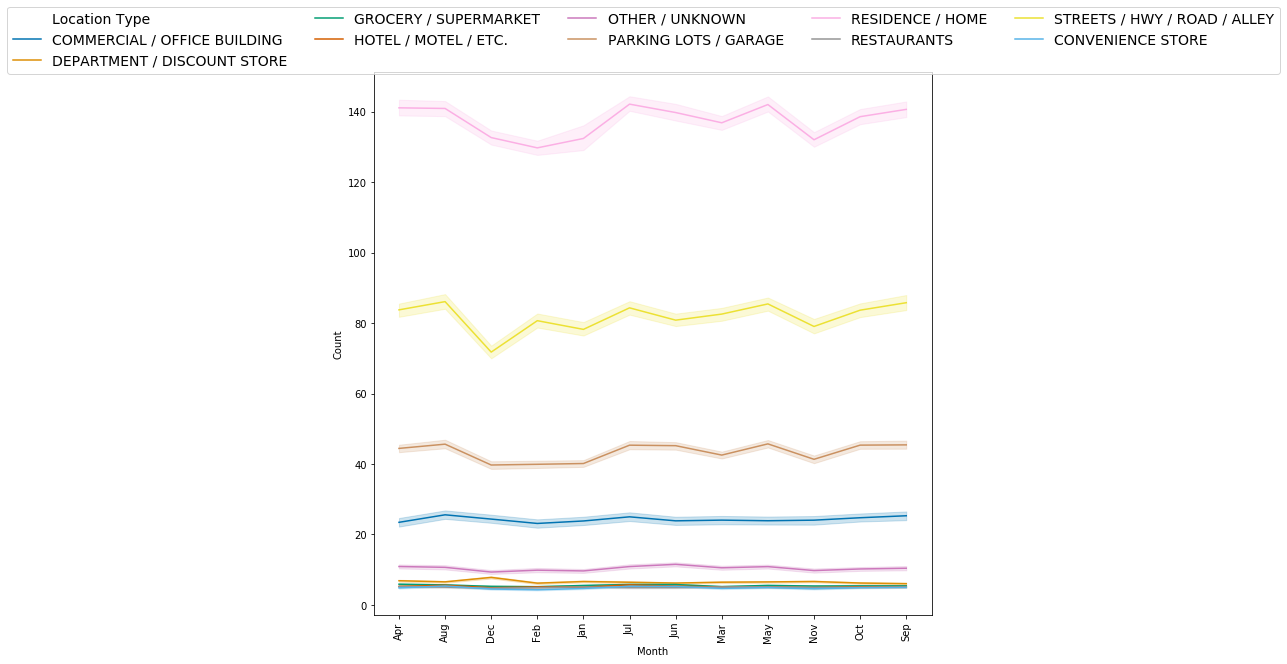

In [15]:
plt.figure(figsize = (10,10))
sb.lineplot(data = df_location, x = 'Month', y = 'Count', hue='Location Type', color='colorblind')
plt.xticks(rotation = 90)
plt.legend(ncol=5, loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, .98), 
           bbox_transform=plt.gcf().transFigure); # Making a custom legend;

Wow! The home is nearly 14 times more likely to be the location of a crime compared to the lowest of the top 10. Even the streets are 36% less likely to be crime ridden when measured against the home. There is also a dip in crime during the winter months. Perhaps criminals don't like the cold.

Next will be doing the same as above, but with the Highest Crime Description instead of the Location Type.

In [16]:
# Save the index for the top 5 crimes
top_5 = top_crimes_5.index
# Making a dataset of only the top 5 crimes
df_top_5 = df[df['Highest Offense Description'].isin(top_5)]
# Reseting the index
df_top_5 = df_top_5.reset_index(drop = True)
# Creating a new column where each row is = 1
df_top_5['Count'] = 1
# Filling in the blanks for the Family Violence column
df_top_5['Family Violence'] = df_top_5['Family Violence'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_top_5_grpd = df_top_5.groupby(['Year', 'Month', 'Highest Offense Description']).count().reset_index()

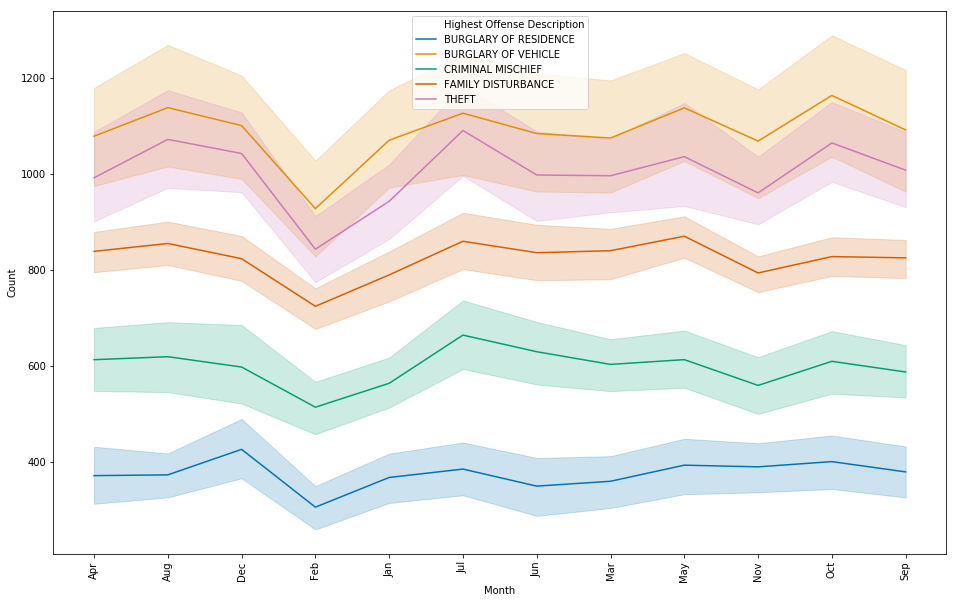

In [17]:
plt.figure(figsize = (16,10))
sb.lineplot(data = df_top_5_grpd, x = 'Month', y = 'Count', hue='Highest Offense Description')
plt.xticks(rotation = 90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There were many similarities between the Highest Offense Description and the Location Type. In the winter months (November through February) crime dips down quite a bit across all areas, with the exception of burglary of residence which could be attributed to Christmas. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The north side of Austin experiences much more crime than other areas, which is surprising to me. All the news ever talks about is "There was a shooting Downtown!" or "There have been a rash of car burglaries on the East side so be aware!". Most of the time only new corporations are talked about when dealing with North Austin. Makes me glad I don't live up there.

I also noticed that the most popular day to report a crime is the 1st of the month. Seems strange but it makes me think that there may be a quota system behind the departments policies.

In [18]:
# Grouping like last time but adding the month column
df_top_5_grpd_ym = df_top_5.groupby(['Year', 'Month', 'Highest Offense Description']).count().reset_index()
df_top_5_grpd.head(5)

,Year,Month,Highest Offense Description,Incident Number,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,...,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Day,Count
0,2003,Apr,BURGLARY OF RESIDENCE,398,398,398,398,398,398,398,...,56,398,398,398,398,398,398,398,398,398
1,2003,Apr,BURGLARY OF VEHICLE,1405,1405,1405,1397,1405,1405,1405,...,86,1405,1405,1405,1405,1404,1404,1404,1405,1405
2,2003,Apr,CRIMINAL MISCHIEF,715,715,715,709,715,715,715,...,115,0,0,715,715,714,714,714,715,715
3,2003,Apr,FAMILY DISTURBANCE,678,678,678,678,678,678,678,...,583,0,0,678,678,678,678,678,678,678
4,2003,Apr,THEFT,743,743,743,743,743,743,743,...,184,743,743,743,743,742,742,742,743,743


In [19]:
# Making a new dataset with only thee columns needed
df_final = df_top_5_grpd_ym[['Month', 'Year', 'Count', 'Highest Offense Description']]

In [20]:
# Regrouping again and tarnsforming
idx = df_final.groupby(['Year', 'Month'])['Count'].transform(max) == df_final['Count']
# Resetting the index
df_final = df_final[idx].reset_index(drop=True)

Making sure the month counts carried over into the final df.

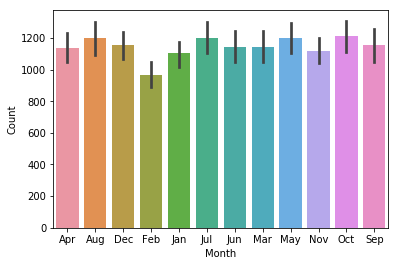

In [21]:
# Barplot to see the monthly total counts
sb.barplot(data = df_final, x = 'Month', y ='Count');

Now it would be prudent to find the months with the highest and lowest crimes.

In [22]:
df_final.Count.max()

1726

In [23]:
df_final.query('Count == "1726"')

,Month,Year,Count,Highest Offense Description
79,Mar,2009,1726,BURGLARY OF VEHICLE


In [24]:
df_final.Count.min()

758

In [25]:
df_final.query('Count == "758"')

,Month,Year,Count,Highest Offense Description
147,Feb,2015,758,BURGLARY OF VEHICLE


Analyzing the crime type and count by the month and year is the next course of action. This will allow any patterns or trends through out the months and years to be easier to visualize, rather than rely on each plot individualy. 

In [26]:
# Regrouping again and tarnsforming
idx = df_location.groupby(['Year', 'Month'])['Count'].transform(max) == df_location['Count']
# Resetting the index
df_locations = df_location[idx].reset_index(drop=True)

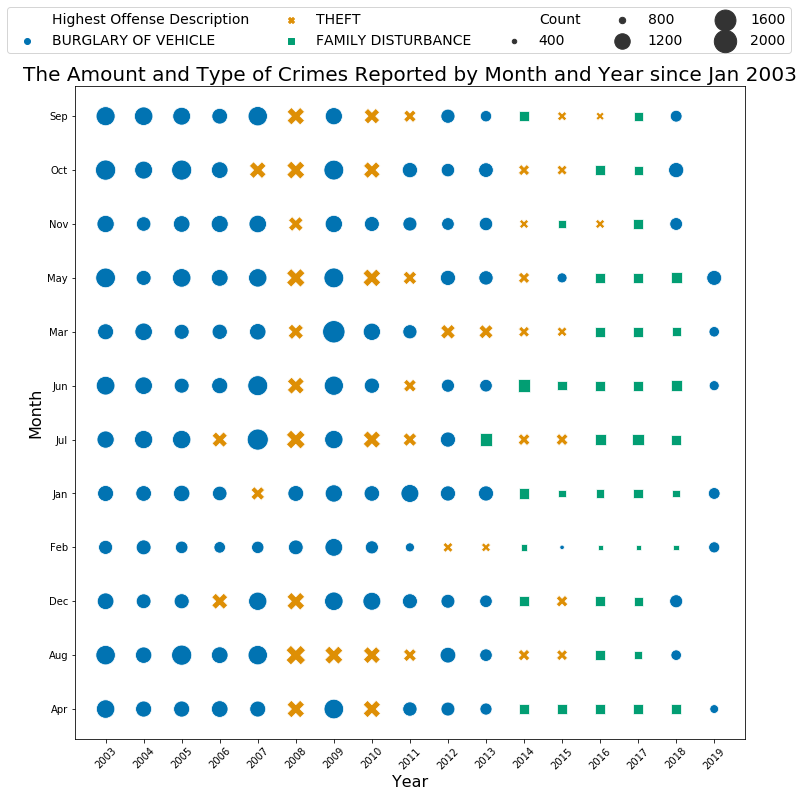

In [27]:
x_ticks=np.arange(2003, 2020, 1) # Making the min x tick to 2003, the max to 2020, and each step being a year
plt.figure(figsize= (12,12)) # Making the figure size 10x10
ax = sb.scatterplot(data = df_final, x = 'Year', y='Month', hue= 'Highest Offense Description',
               style='Highest Offense Description', size='Count', sizes= (20, 500))
# Making a scatter plot with x being the Year column, y is the Month column, the hue and style are the Highest Offense 
# Description column, and making the size of the points dependant on the count size
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., ncol=2) # Moving the legend outside of the plot
plt.title('The Amount and Type of Crimes Reported by Month and Year since Jan 2003', fontsize=20) # Making the title and font size
plt.xticks(x_ticks, rotation=45) # Rotating the years for easier viewing 
plt.xlabel('Year', fontsize=16) # Making the x label and font size
plt.ylabel('Month', fontsize=16) # Making the x label and font size
ax.legend(ncol=5, loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, .98), bbox_transform=plt.gcf().transFigure); # Making a custom legend

The sheer amount of Burglary of Vehicle is staggering. It took up most of the chart which reinforces the previous graphs and data. There seems to have been a lot of theft in 2008 which could have been caused by the recession and many people moving to Austin. A similar trend happened in the summer of 2010. Since 2014 though, Family Disturbance has been on the rise. While the numbers of Family Disturbance have yet to reach the severity of thefts it is definitely sad to see them growing. As of August of 2018 Burglary of Vehicle has continued its trend of being the most popular crime to report.

I wonder how running the same test with Location Type will turn out.

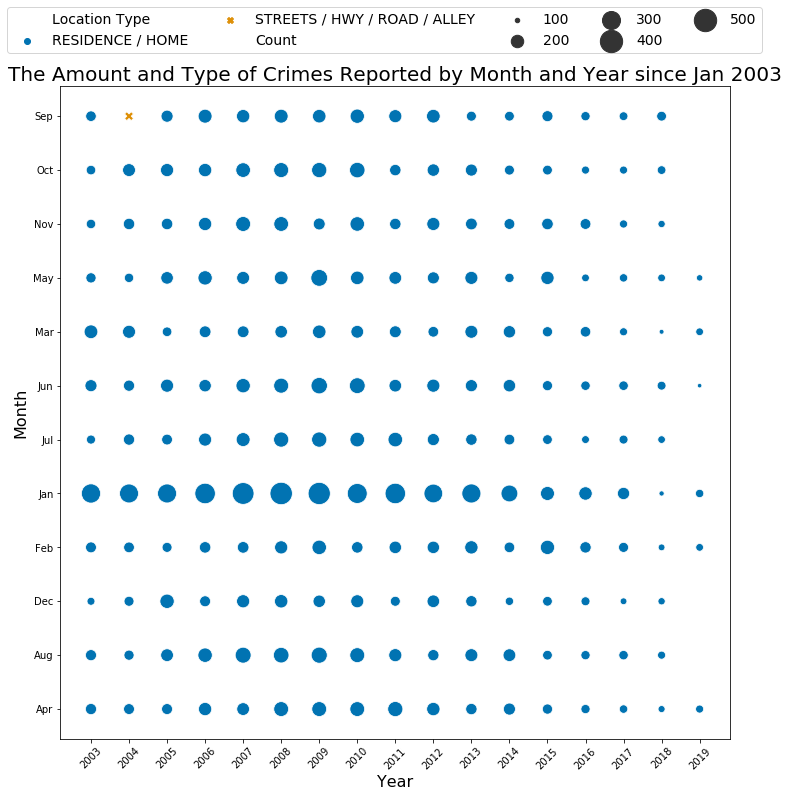

In [28]:
x_ticks=np.arange(2003, 2020, 1) # Making the min x tick to 2003, the max to 2020, and each step being a year
plt.figure(figsize= (12,12)) # Making the figure size 10x10
ax = sb.scatterplot(data = df_locations, x = 'Year', y='Month', hue= 'Location Type',
               style='Location Type', size='Count', sizes= (20, 500))
# Making a scatter plot with x being the Year column, y is the Month column, the hue and style are the Highest Offense 
# Description column, and making the size of the points dependant on the count size
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., ncol=2) # Moving the legend outside of the plot
plt.title('The Amount and Type of Crimes Reported by Month and Year since Jan 2003', fontsize=20) # Making the title and font size
plt.xticks(x_ticks, rotation=45) # Rotating the years for easier viewing 
plt.xlabel('Year', fontsize=16) # Making the x label and font size
plt.ylabel('Month', fontsize=16) # Making the x label and font size
ax.legend(ncol=5, loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, .98), bbox_transform=plt.gcf().transFigure); # Making a custom legend

It's no surprise that the whole plot is filled with the home location. What is surprising is how many incidents occur during January and how few in December. The peak was in 2009 and hasdescended until present with a steeper motion in 2016. During September of 2004 the most crimes happened on the streets, this is the only exception in all the data.

Since I have checked all of the month and years I think it would be reasonable to see which specific day on the year had the most crime reported.

In [29]:
# Save the index for the top 5 crimes
top_5 = top_crimes_5.index
# Making a dataset of only the top 5 crimes
df_top_5 = df[df['Highest Offense Description'].isin(top_5)]
# Reseting the index
df_top_5 = df_top_5.reset_index(drop = True)
# Creating a new column where each row is = 1
df_top_5['Count'] = 1
# Filling in the blanks for the Family Violence column
df_top_5['Family Violence'] = df_top_5['Family Violence'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_top_5_grpd = df_top_5.groupby(['Highest Offense Description', 'Month', 'Day']).count().reset_index()

In [30]:
# Making a new dataset with only thee columns needed
df_finale = df_top_5_grpd[['Day', 'Highest Offense Description', 'Month', 'Count']]

<Figure size 864x576 with 0 Axes>

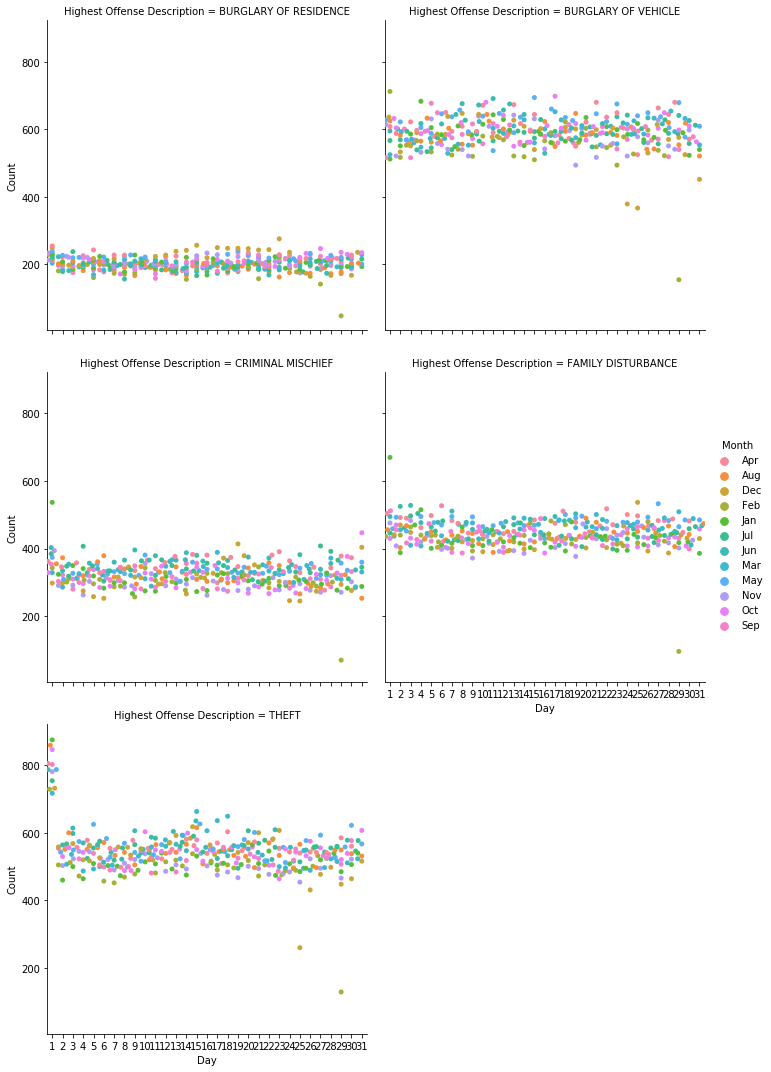

In [36]:
plt.figure(figsize=(12, 8))
sb.catplot(data=df_finale, x='Day', y='Count', hue='Month', kind='swarm', col='Highest Offense Description',
          col_wrap=2);

The thing that stands out the most is that the first and the middle of the month are the times when crime is reported most often. Although January 1st being the date with the most crimes makes sense because in Texas the new year gets crazy! On the opposite end of the spectrum February 29th having the least is unsurprising because it only happens on a leap year so i makes sense that it wwould be 5 times less than the norm. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The features were definitely strengthened by the deeper dive into the data. Throughout the data crime has decreased on every front. The time of year and day of month have an effect on crime. During the winter months reporting decreases then returns to normal during the other 3 seasons. The 1st and 15th are the worst days to file a report because it may not be seen due to the sheer volume in relation to the other days of the month. In January there are much more crimes commited in homes compared to normal.

### Were there any interesting or surprising interactions between features?

The biggest surprise to me was that the 1st and 15th nare the worst days for crimes to be reported. Perhaps it could be attributed to people robbing cars to get a paycheck left in them. Other than that idea I have no clue why else it would happen.  September of 2004 had a very interesting anomaly where more crimes were perpetrated on the streets rather than in homes. There was also a trend in 2008 where theft became the leading crime which made a slight reappearance in 2010. Family Disturbance starting in January 2014 and ending in July 2018 was the most unnerving trend I found. I would much rather have someone rob my car than to bother me in my home. 

In summary, if you don't want to be one of these statistics don't celebrate new years in Austin.